# AIM:  RECOGNIZE AN ANIMAL IN AN IMAGE

# Different Models that I tried:
### 1) Densenet169
### 2) Sequential Model (MLP)
### 3) Convolution Neural Network (CNN)

## 1) DENSENET169 (Transfer Learning model)

### Libraries to import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline

import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
import datetime

%load_ext tensorboard
import glob
import cv2


### Reading the csv files which contain image labels for each image of training & testing dataset and target variable of each image of training dataset

In [2]:
training_labels=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv")
testing_labels=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv",header=None)
testing_labels.columns=['filename']

### Checking the counts of each category

In [3]:
training_labels['animal_type'].value_counts()


mucca     600
pecora    600
Name: animal_type, dtype: int64

### Reading all the images in train dataset from the path specified in a loop using cv2 function imread() and appended the images to the list

In [4]:
training_images = []
for img in glob.glob(r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\train\train_beg\*.jpg'):
    n= cv2.imread(img)
    training_images.append(n)

### Reading all the images in test dataset from the path specified in a loop using cv2 function imread() and appended  the images to the list

In [5]:
testing_images = []
for img in glob.glob(r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\test\test_beg\*.jpg'):
    n= cv2.imread(img)
    testing_images.append(n)

### Checking whether the length of the training images read from the path specified is same as the length of the training labels read from csv file

In [6]:
if len(training_labels) == len(training_images):
    print('Number of labels i.e. ', len(training_labels), 'matches the number of filenames i.e. ', len(training_images))
else:
    print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  1200 matches the number of filenames i.e.  1200


### Checking whether the length of the testing images read from the path specified is same as the length of the testing labels read from csv file

In [7]:
if len(testing_labels) == len(testing_images):
    print('Number of labels i.e. ', len(testing_labels), 'matches the number of filenames i.e. ', len(testing_images))
else:
    print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  400 matches the number of filenames i.e.  400


### Checking the length of the testing images

In [8]:
len(testing_images) 

400

### Creating a dataframe which contains the image labels, path, target labels of the training dataset

In [ ]:
path1=r"C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\train\train_beg/"

    
images = [[fname, path1+ fname[:-4] + '.jpg'] for fname in training_labels['filename']]
train_df = pd.DataFrame(images)
train_df.columns = ['filename', 'file']
train_df['labels']=training_labels['animal_type']

def mappp(x):
    if x=="mucca":
        return 0
    else: return 1
    
train_df['labels_num']=train_df['labels'].map(mappp)
y_train=np.array(train_df['labels_num'])

### 1. Reading each of the training images in the dataframe using the path specified in the 'file' column in a loop using cv2 function imread and resized the images to (224,224) and appended the images to the images_train list
### 2. Also using the interpolation method inter_cubic, because cv2.INTER_CUBIC is slow but more efficient.

In [10]:
images_train=[]
for img in train_df['file']:
    img=cv2.imread(img)
    img = cv2.resize(img, (224,224),interpolation=cv2.INTER_CUBIC)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images_train.append(img)

### To get the pixel values of the images in images_train list, Converting it into the numpy array and assign it back to the images_train and Displaying one of the images in the images_train

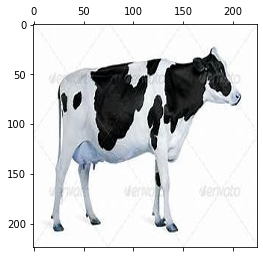

In [11]:
images_train=np.array(images_train)
plt.matshow(images_train[9])


### Displaying some of the images in the images_train using cv2 funtion imshow() along with the labels of an image

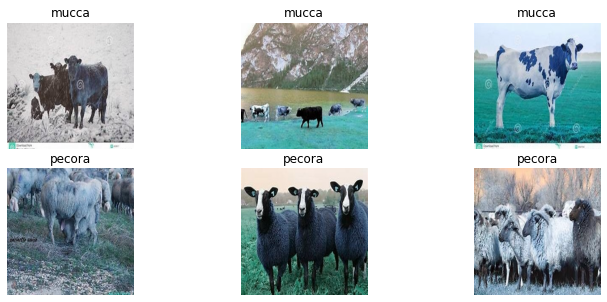

In [12]:
num_rows, num_cols = 2,3
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.15, 'hspace':0.15}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r*650 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(images_train[image_index], cmap='gray')
        ax[r,c].set_title(train_df['labels'][image_index])
plt.show()
plt.close()

### Creating a dataframe which contains the image labels, path of the testing dataset

In [ ]:

path2=r"C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\test\test_beg/"

images = [[fname, path2+ fname[:-4] + '.jpg'] for fname in testing_labels['filename']]
test_df = pd.DataFrame(images)
test_df.columns = ['filename', 'file']

### 1. Reading each of the testing images in the dataframe using the path specified in the 'file' column in a loop using cv2 function imread and resized the images to (224,224) and appended the images to the images_test list
### 2. Also using the interpolation method inter_cubic, because cv2.INTER_CUBIC is slow but more efficient.

In [14]:
images_test=[]
for img in test_df['file']:
    img=cv2.imread(img)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (224,224),interpolation=cv2.INTER_CUBIC)
    images_test.append(img)

### To get the pixel values of the images in images_test list, Converting it into the numpy array and assign it back to the images_test and Displaying one of the images in the images_test

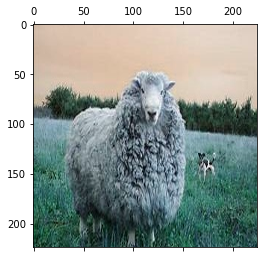

In [15]:
images_test=np.array(images_test)
plt.matshow(images_test[1])


### Displaying some of the images in the images_test using cv2 funtion imshow() 

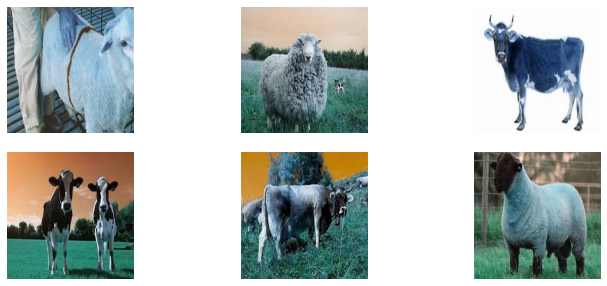

In [16]:
num_rows, num_cols = 2,3
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.15, 'hspace':0.15}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r*200 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(images_test[image_index], cmap='gray')
        
plt.show()
plt.close()

### Checking the shape of the images_train and images_test. Also, printing one of the images in the images_train to see the pixel values distribution

In [17]:
images_train.shape

(1200, 224, 224, 3)

In [18]:
images_test.shape

(400, 224, 224, 3)

In [19]:
images_train[0]

array([[[207, 205, 205],
        [207, 205, 205],
        [207, 205, 205],
        ...,
        [203, 202, 204],
        [204, 203, 205],
        [205, 204, 206]],

       [[205, 203, 203],
        [206, 204, 204],
        [206, 204, 204],
        ...,
        [202, 201, 203],
        [204, 203, 205],
        [206, 205, 207]],

       [[207, 205, 205],
        [205, 203, 203],
        [205, 203, 203],
        ...,
        [202, 201, 203],
        [205, 204, 206],
        [207, 206, 208]],

       ...,

       [[244, 251, 246],
        [239, 254, 251],
        [219, 255, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[241, 249, 244],
        [237, 255, 250],
        [217, 255, 249],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[243, 251, 246],
        [239, 255, 252],
        [219, 255, 251],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

### Here comes the major part of the project. It's model selection. 
###  I will first list down all the models that I tried so far:
#### a) Sequential model - which i will be adding again in the notebook since its considered for an evaluation. It is in another notebook and I m trying to merge all in one notebook
#### b) Convolution Neural Network - which also i will be adding in the same notebook at the end 
#### c) Transfer Learning - Pretrained model 
#####      1) vgg16 
#####      2) vgg19
#####      3) resnet50
#####      4) resnet152
#####      5) densenet121
#####      6) densenet169
#####      7) inceptionv3
#####      8) mobilenet
#####      9) mobilenetv2



### Downloading the densenet169 from tf.keras.applications with weights as imagenet and include_top =false so that we can add our own dense layers at the end and the input shape with the shape mentioned in the INPUT_SHAPE variable

In [20]:
# define input shape
INPUT_SHAPE = (224,224,3)

# get the densenet169 model
vgg_layers = tf.keras.applications.densenet.DenseNet169(weights='imagenet', include_top=False, 
                                               input_shape=INPUT_SHAPE)
# ignore the variable name as vgg_layers as I reused my first code for all the other models by changing the pretrained modelsto check how each pretrained models work

#print the summary and architecture of densenet169 layers
vgg_layers.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

conv4_block22_2_conv (Conv2D)   (None, 14, 14, 32)   36864       conv4_block22_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block22_concat (Concatena (None, 14, 14, 960)  0           conv4_block21_concat[0][0]       
                                                                 conv4_block22_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block23_0_bn (BatchNormal (None, 14, 14, 960)  3840        conv4_block22_concat[0][0]       
__________________________________________________________________________________________________
conv4_block23_0_relu (Activatio (None, 14, 14, 960)  0           conv4_block23_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_block23_1_conv (Conv2D)   (None, 14, 14, 128)  122880      conv4_block23_0_relu[0][0]       
__________

### Fine tuning all the layers, so that will train the model according to the input images that we feed 

In [21]:
# Fine-tune all the layers
for layer in vgg_layers.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x00000246FD9D5640> True
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x00000246FDA16D30> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000246FDA324F0> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x00000246FDA323A0> True
<tensorflow.python.keras.layers.core.Activation object at 0x00000246FDA3FC10> True
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x00000246FDA9E370> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x00000246FDBA80A0> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x00000246FDBA8F40> True
<tensorflow.python.keras.layers.core.Activation object at 0x00000246FDC05130> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000246FDC0AF70> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x0000

### Here I use 
#### 1) RMSprop as the optimizer with the very less learning rate(2e-5) so that model will be trained very slowly and wont miss the global minima (Also I tried the adam, it also gave the good accuracy with the same learning rate)
#### 2) Activation function as relu, as we all know the thumb rule that we should relu or leaky relu in the intermediate layers, so i tried with relu activation function
#### 3) No of neurons is again an trail and error method that I tried. with 512,1024, 2000 neurons in the hidden layers. I got good accuracy with 1024 and also with 2000. I chose 1024, because it is a multiple of 2
#### 4) Loss as sparse_categorical_crossentropy - it gave the good results. I tried binary_crossentropy with the adam and RMSprop optimizers. It really gave me poor accuracy even in the validated dataset
 I created the sequntial model and added the densenet169 layers to it.  Then, I flattened it so that we can give the inputs to the densely connected layers at the end. Followed by the flatten layers, i added two hidden layers and one output layer with 2 neurons, since we have two output as( 0 or 1) and used softmax as the activation function - it will give the probabilties for each categories in the ouput that we try to classify. I also tried with sigmoid. I dont feel it made much difference to the mdoel

##### When I tried with binary_crossentropy as loss funtion, I din get the accuracy at all. It was around zero

In [22]:
import random
from tensorflow.keras.optimizers import RMSprop

random.seed(21)
print(random.random())
# define sequential model
model = tf.keras.models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_layers)

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(1024, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.1))


# add output layer
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

0.16494947983319797
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Functional)     (None, 7, 7, 1664)        12642880  
_________________________________________________________________
flatten (Flatten)            (None, 81536)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              83493888  
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 97,188,418
Trainable params: 97,030,018
Non-trainable params: 158,400
_________________________________________________________________


### converting the labels_num column in the train_df into the numpy array so that we can use it to fit the model

In [23]:
y=np.array(train_df['labels_num'])

### Spliting the data into train and validation set  80:20 ratio using sklearn.model_selection

In [24]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(train_df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [25]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

### Augumenting the images with ImageData Generator from tf.keras.preprocessing.image with the following trainsformations from rescaling to flipping

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.1
)


### Augumenting the training images with the different transformations that I created above with the batch size as 32 and class mode as binary since we have two output classes

Since, I m reading all the images using train_df dataframe 'filepath' column - Using flow_from_dataframe method instead of flow_from_directory

In [27]:
train_generator = train_datagen.flow_from_dataframe(train_df,r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\train\train_beg/',
                                             x_col='filename',y_col='labels',class_mode='binary',
                                   batch_size=32, target_size=(224,224),shuffle=False)

Found 960 validated image filenames belonging to 2 classes.


### Creating the validation datagenerator only for rescaling images in the Validation dataset without augumenting the images

In [28]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\train\train_beg/',
                                             x_col='filename',y_col='labels',class_mode='binary',
                                   batch_size=32, target_size=(224,224),shuffle=False)



Found 240 validated image filenames belonging to 2 classes.


### Displaying some of the images in the train_generator

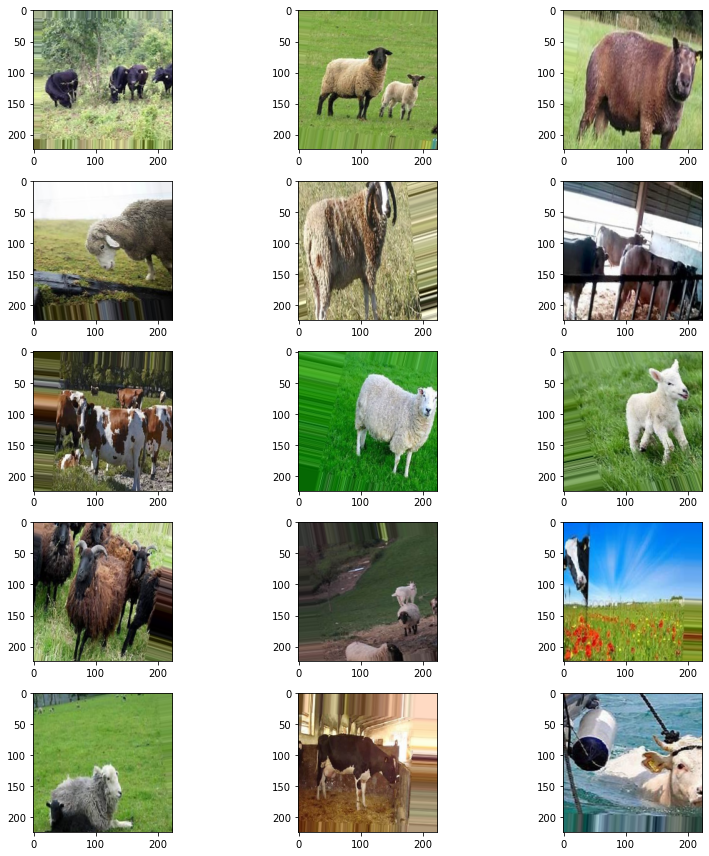

In [29]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Look what I found in the training dataset :-p
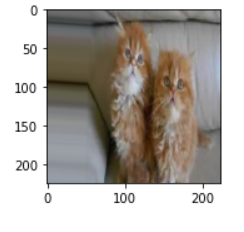


### Checking how images are augumented with the sample data

In [30]:
example_df = train_df.sample(n=2).reset_index(drop=True)
example_df.head()
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\train\train_beg/', 
    x_col='filename',
    y_col='labels',
    target_size=(224,224),
    class_mode='categorical'
)


Found 2 validated image filenames belonging to 1 classes.


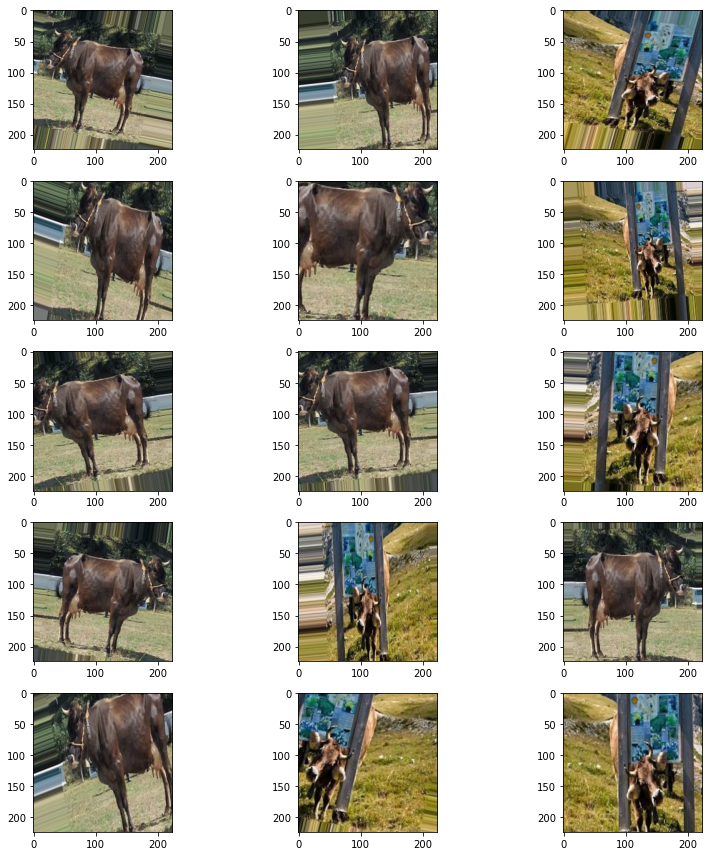

In [31]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

###  Fitting the model upto 7 epochs with patience = 2. If the val_loss does not have any improvement for more than two epocs, it will automatically save the model with the best_weights 
Here the val_loss increases from 5th epoch. so the model stopped learning in 6th epochs since I mentioned patience = 2
As it shows like 97% accuracy on training dataset and 96% accuracy on validation dataset, I got an accuracy of around 97% on testing dataset. So the model is not overfitting/underfitting 

In [32]:
EPOCHS = 7

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history = model.fit(
    train_generator, 
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=[es_callback]
)


Epoch 1/7
30/30 [==============================] - 1623s 54s/step - loss: 0.6210 - accuracy: 0.8104 - val_loss: 0.1485 - val_accuracy: 0.9375
Epoch 2/7
30/30 [==============================] - 1254s 42s/step - loss: 0.1789 - accuracy: 0.9302 - val_loss: 0.3041 - val_accuracy: 0.9062
Epoch 3/7
30/30 [==============================] - 1254s 42s/step - loss: 0.1543 - accuracy: 0.9365 - val_loss: 0.1316 - val_accuracy: 0.9509
Epoch 4/7
30/30 [==============================] - 31291s 1043s/step - loss: 0.0563 - accuracy: 0.9792 - val_loss: 0.2487 - val_accuracy: 0.9330
Epoch 5/7
30/30 [==============================] - 1370s 46s/step - loss: 0.0920 - accuracy: 0.9708 - val_loss: 0.1578 - val_accuracy: 0.9598
Epoch 00005: early stopping


### Plotting the loss and accuracy curves of training and validation data

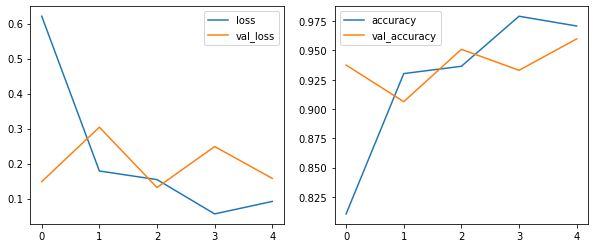

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

### Creating the test datagenerator only for rescaling images in the test dataset without augumenting the images

In [34]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\test\test_beg/', 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(224,224),
    batch_size=batch_size,
    shuffle=False
)

Found 400 validated image filenames.


### Predicting the unseen data with the model that I trained with the training dataset

In [35]:
# X_test_flattened=images_test/255
y_predict=model.predict(test_generator)


### As softmax produces the probabilities of the ouput classes, I have used numpy.argmax() function to get the maximum probabilities index

In [36]:
final=[]
for i in range(0,len(images_test)):
    final.append(np.argmax(y_predict[i]))
    

### Here you can see the final output index values. In my model I mentioned '0' as 'mucca' and '1' as 'pecora' in the train_df labels_num column. 

In [37]:
final

[1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,


### Creating the dataframe with string values by replacing the indices values with mucca and pecora

In [38]:
g=pd.DataFrame(final)
g[0]=g[0].replace({1.0:'pecora',0.0:'mucca'})
g

,0
0,pecora
1,pecora
2,mucca
3,pecora
4,pecora
...,...
395,mucca
396,pecora
397,pecora
398,pecora


### Converting the dataframe to csv for submission. I submitted this model's output and got an accuracy of 97 % in the leaderboard

In [39]:
res = g 
res.columns = ["prediction"]
res.to_csv("highestlatest.csv")

### Saving the model

In [41]:
model.save_weights("animal.h5") 

In [42]:
model.save('saved_model/my_model')


INFO:tensorflow:Assets written to: saved_model/my_model\assets


#### Achieved accuracy of around 97 % on testdataset with this model

# 2) Sequential Model (Multi Layer Perceptron)

I would be repeating some of the steps again as it is considered for evaluation

### Libraries to import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline

import tensorflow as tf  
from tensorflow import keras  
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
import datetime
import glob
import cv2
%load_ext tensorboard

In [2]:
#Checking the tensorflow version
print(tf.__version__)

2.3.0


# 1) Loading Data 

### Reading the csv files which contain image labels for each image of the training & testing dataset and target variable of each image of the training dataset

In [3]:
training_labels=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv")
testing_labels=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv",header=None)
testing_labels.columns=['filename']

### Checking the count of each category

In [4]:
training_labels['animal_type'].value_counts()

pecora    600
mucca     600
Name: animal_type, dtype: int64

### Reading all the images in train dataset from the path specified in a loop using cv2 function imread() and appended the images to the list

In [5]:
training_images = []
for img in glob.glob(r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\train\train_beg\*.jpg'):
    n= cv2.imread(img)
    training_images.append(n)

### Reading all the images in test dataset from the path specified in a loop using cv2 function imread() and appended the images to the list

In [6]:
testing_images = []
for img in glob.glob(r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\test\test_beg\*.jpg'):
    n= cv2.imread(img)
    testing_images.append(n)

### Checking whether the length of the training images read from the path specified is same as the length of the training labels read from csv file

In [7]:
if len(training_labels) == len(training_images):
    print('Number of labels i.e. ', len(training_labels), 'matches the number of filenames i.e. ', len(training_images))
else:
    print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  1200 matches the number of filenames i.e.  1200


### Checking whether the length of the testing images read from the path specified is same as the length of the testing labels read from csv file

In [8]:
if len(testing_labels) == len(testing_images):
    print('Number of labels i.e. ', len(testing_labels), 'matches the number of filenames i.e. ', len(testing_images))
else:
    print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  400 matches the number of filenames i.e.  400


### Creating a dataframe which contains the image labels, path, target labels of the training dataset

In [ ]:
path1=r"C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\train\train_beg/"

    
images = [[fname, path1+ fname[:-4] + '.jpg'] for fname in training_labels['filename']]
train_df = pd.DataFrame(images)
train_df.columns = ['filename', 'file']
train_df['labels']=training_labels['animal_type']

def mappp(x):
    if x=="mucca":
        return 0
    else: return 1
    
train_df['labels_num']=train_df['labels'].map(mappp)
y_train=np.array(train_df['labels_num'])

# 2) Preprocessing Images
1. resize
2. converting to grayscale
3. normalizing the pixel values
##### Displaying the images with the output labels

### 1. Reading each of the training images in the dataframe using the path specified in the 'file' column in a loop using cv2 function imread and resized the images to (32,32)
### 2. Also using the interpolation method inter_cubic, because cv2.INTER_CUBIC is slow but more efficient.
### 3. Converted the rgb images to grayscale as I am using the normal sequential NN and appended to the list

In [10]:
images_train=[]
for img in train_df['file']:
    img=cv2.imread(img)
    img = cv2.resize(img, (32,32),interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images_train.append(img)

### To get the matrix values of the images in images_train list, Converting it into the numpy array and assign it back to the images_train and Displaying one of the images in the images_train


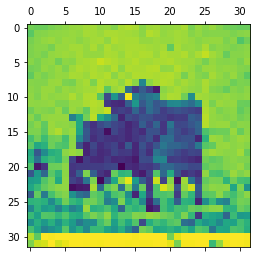

In [11]:
images_train=np.array(images_train)
plt.matshow(images_train[0])


### Displaying some of the images in the images_train using cv2 funtion imshow() along with the labels of an image

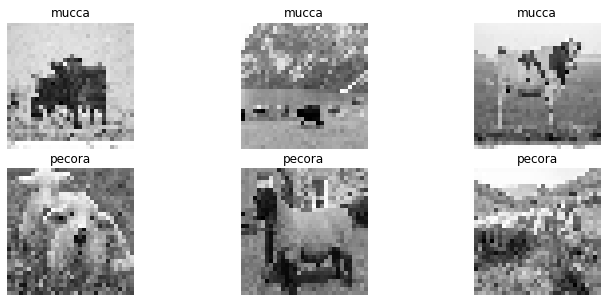

In [12]:
num_rows, num_cols = 2,3
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.15, 'hspace':0.15}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r*600 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(images_train[image_index], cmap='gray')
        ax[r,c].set_title(train_df['labels'][image_index])
plt.show()
plt.close()


### Creating a dataframe which contains the image labels, path of the testing dataset

In [ ]:
path2=r"C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\test\test_beg/"

images = [[fname, path2+ fname[:-4] + '.jpg'] for fname in testing_labels['filename']]
test_df = pd.DataFrame(images)
test_df.columns = ['filename', 'file']

### 1. Reading each of the testing images in the dataframe using the path specified in the 'file' column in a loop using cv2 function imread and resized the images to (224,224)
### 2. Also using the interpolation method inter_cubic, because cv2.INTER_CUBIC is slow but more efficient.
### 3.  Converted the rgb images to grayscale as I am using the normal sequential NN and appended to the list

In [14]:
images_test=[]
for img in test_df['file']:
    img=cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (32,32),interpolation=cv2.INTER_CUBIC)
    images_test.append(img)


#### To get the matrix values of the images in images_test list, Converting it into the numpy array and assign it back to the images_test and Displaying one of the images in the images_test

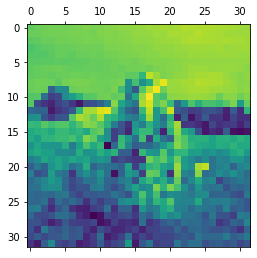

In [15]:
images_test=np.array(images_test)
plt.matshow(images_test[1])


### Displaying some of the images in the images_test using cv2 funtion imshow() 

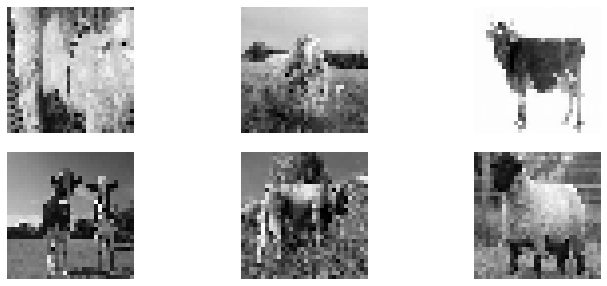

In [16]:
num_rows, num_cols = 2,3
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.15, 'hspace':0.15}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r*200 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(images_test[image_index], cmap='gray')
        
plt.show()
plt.close()

### Checking the shape of the images_train and images_test. Also, printing one of the images in the images_train to see the pixel values distribution

In [17]:
images_train.shape

(1200, 32, 32)

In [18]:
images_test.shape

(400, 32, 32)

### Reshaping the images so that it can be flattened and can be used directly into the NN

In [19]:
X_train_flattened = images_train.reshape(len(images_train), 32*32) 

X_test_flattened = images_test.reshape(len(images_test),  32*32) 

In [20]:
X_train_flattened.shape

(1200, 1024)

In [21]:
X_test_flattened.shape

(400, 1024)

In [22]:
classification=['mucca','pecora']

### converting the labels_num column in the train_df into the numpy array so that we can use it to fit the model

In [23]:
y=np.array(train_df['labels_num'])

In [24]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [25]:
X_train_flattened[0]

array([205, 202, 202, ..., 254, 253, 251], dtype=uint8)

### Normalizing the pixel values 

In [26]:
X_train_flattened=X_train_flattened/255
X_test_flattened=X_test_flattened/255


In [27]:
X_train_flattened[0]

array([0.80392157, 0.79215686, 0.79215686, ..., 0.99607843, 0.99215686,
       0.98431373])

# 3) Building a Multi-Layer Perceptron
# 4)  Optimizer
# 7) Optimization Techniques - Early stopping and dropouts


### Here is my MLP model with 1 input layer, 4 hidden layers with 0.1 dropout at first hidden layer and one output layer

1. Optimizer: a) Adam - I tried with SGD, RMSprop for this model. Fortunately Adam optimizer gave me the best results. I chose it based on the trial
   b)sigmoid : At the output layer, as it will give the probabilites of the different categories of the output
2. Learning Rate: Using the default learning rate of Adam optimizer, when i try to reduce even more further, i got an poor accuracy in validation set
3. Metrics : Accuracy - As it is the metric that the model is evaluated on the test data
4. Number of neurons and layers - Chose 256 for the first layer, because it is 1/4 th of the input data shape and again added (multiples of 2)(128,64,32) neurons in the next three layers in decreasing order. 
5. Also after adding dropout (0.1), my accuracy has slighly increased comparitively. Also used earlystopping method with patience =5
6. loss function: binary_crossentropy - It worked well with this MLP Model then sparse_categorical_crossentropy

In [45]:
import random
random.seed(1)
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(1024,)))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu',))
model.add(Dense(64,activation='relu',))
model.add(Dense(32,activation='relu',))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


### Creating a folder for the logs to visualize it in tensorboard 

In [46]:
from datetime import datetime
log_dir = "logs/assgn35/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


# 5)  Training the model


### Fitting the model with the tensorboard and earlystopping callbacks, validation split=0.2 and train data =0.8, bath size=20 and epochs =15

In [47]:
history=model.fit(X_train_flattened,y,validation_split=0.2,batch_size=20, epochs=15,callbacks=[es,tensorboard_callback])

Epoch 1/15
48/48 [==============================] - 2s 50ms/step - loss: 0.6714 - accuracy: 0.6042 - val_loss: 1.2757 - val_accuracy: 0.0000e+00
Epoch 2/15
48/48 [==============================] - 0s 5ms/step - loss: 0.6589 - accuracy: 0.6052 - val_loss: 0.9404 - val_accuracy: 0.0000e+00
Epoch 3/15
48/48 [==============================] - 0s 10ms/step - loss: 0.6396 - accuracy: 0.6219 - val_loss: 0.9154 - val_accuracy: 0.0917
Epoch 4/15
48/48 [==============================] - 0s 7ms/step - loss: 0.6279 - accuracy: 0.6458 - val_loss: 1.0278 - val_accuracy: 0.0958
Epoch 5/15
48/48 [==============================] - 1s 11ms/step - loss: 0.6280 - accuracy: 0.6448 - val_loss: 1.2590 - val_accuracy: 0.0250
Epoch 6/15
48/48 [==============================] - 0s 8ms/step - loss: 0.6272 - accuracy: 0.6521 - val_loss: 1.1266 - val_accuracy: 0.0042
Epoch 7/15
48/48 [==============================] - 0s 6ms/step - loss: 0.6146 - accuracy: 0.6583 - val_loss: 0.6496 - val_accuracy: 0.7125
Epoch 8/1

# 8) Predicting the unseen data with the MLP model

#### As sigmoid produces the probabilities of the ouput class, I have used numpy.round() function to get the rounded value. Here I used binary_crossentropy with one neuron at the output layer so it will ouput one probability for each input.

In [48]:
y_predict=model.predict(X_test_flattened)
n=np.round(y_predict)

In [49]:
n

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

###  In my model I mentioned '0' as 'mucca' and '1' as 'pecora' in the train_df labels_num column. 
### Creating the dataframe with string values by replacing the indices values with mucca and pecora

In [50]:
f=pd.DataFrame(n)
f[0]=f[0].replace({1.0:'pecora',0.0:'mucca'})
f

,0
0,pecora
1,pecora
2,mucca
3,pecora
4,pecora
...,...
395,mucca
396,pecora
397,pecora
398,mucca


In [51]:
res = f #target is nothing but the final predictions of your model on input features of your new unseen test data
#res.index = test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("anima20.csv")

# 6) Tensorboard

### TENSORBOARD FOR VISUALIZING THE ACCCURACY AND LOSS CURVES

In [54]:
%load_ext tensorboard
%tensorboard --logdir logs/assgn35 --host localhost --port 8006

Reusing TensorBoard on port 8006 (pid 19060), started 0:00:52 ago. (Use '!kill 19060' to kill it.)

### Adding the snap of the tensorboard, if the tensorboard din show, kindly refer this image also submitted the logs I got

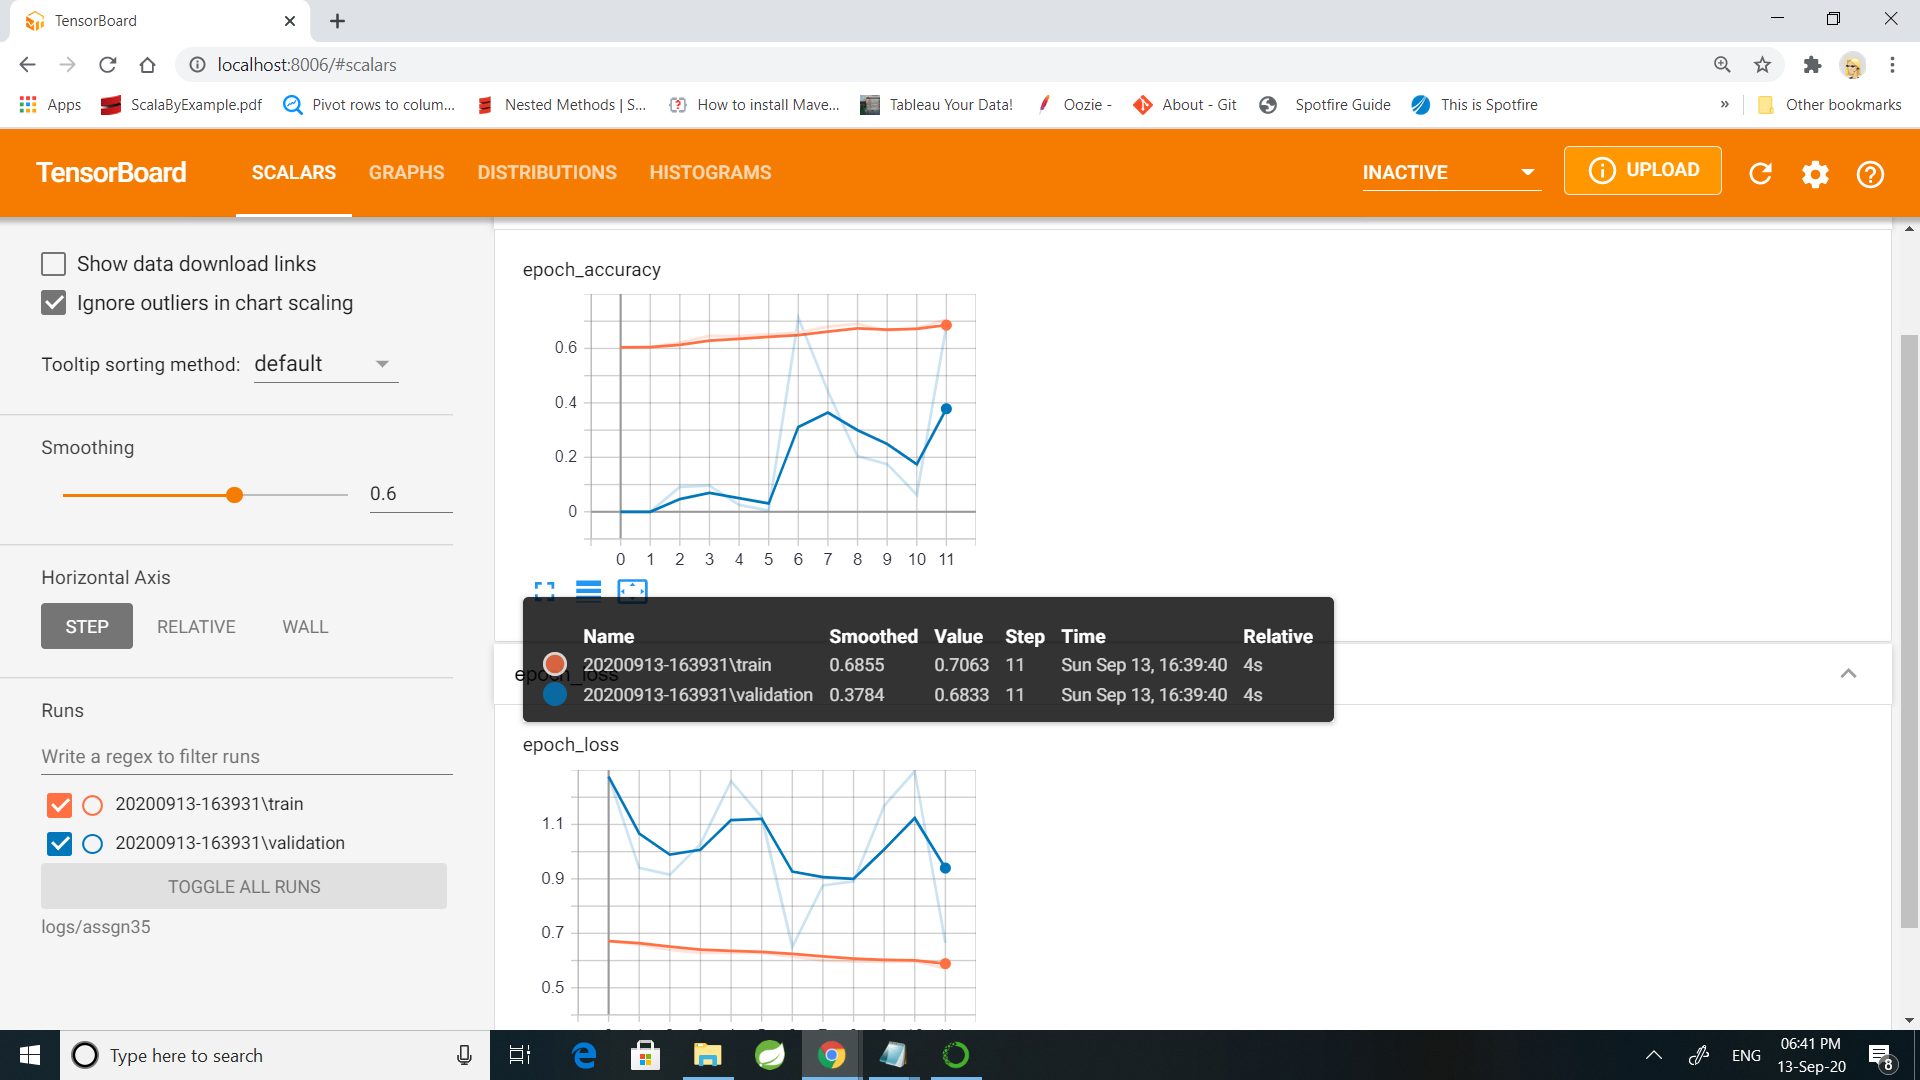

### Printing the model summary  & Architecture Explanation


Input shape - 1024
##### No of params to calculate in each layer
1. First Hidden layer - (1024+1)*256 = 262400
2. Second Hidden layer - (256+1)*128 = 32896
3. Third Hidden layer - (128+1)*64 =8256
4. Fourth Hidden layer - (64+1)*32 =2080
5. Output layer-(32+1)*1 =33

a) So, There are One Input layer with input shape of 1024, and four hidden layers with 0.1 dropout at the first hidden layer and one output layer. Output shape column represents the number of neurons in each hidden layers and output layer
b) Total params and trainable params for this model is 305665

In [55]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 33        
Total params: 305,665
Trainable params: 305,665
Non-trainable params: 0
________________________________________________

### Saving the model

In [56]:
model.save('saved_model/my_model_mlp')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model_mlp\assets


In [57]:
# Achieved accuracy of around 61.5% on testdataset

# INFERENCES:


1) Out of all these models, I got around 85 - 94% accuracy when I used vgg16,vgg19, densenet 121, densenet 169 and mobilenet models without data augumentation. 

2) With data augumentation, I got 95-97% with densenet169 and densenet 121

3) Acheived the poor accuracy when I used resnet models - may be due to less input data that I fed into the model

4) With normal MLP network, got an accuracy around 59-62% on test dataset 

5) With CNN models, got an accuracy around 69-77 % on test dataset

6) Achieved the highest accracy of around 97% on the test dataset with the pretrained model densenet169 with RMSprop optimizer by training all the layers in the model. It actually took some hours to train. Even Densenet169 and adam combo gave me the same results

7) Image size plays a major role based on the model

a) when i tried with normal MLP 28*28 OR 32*32 size images gave me the good accuracy without overfitting/underfitting. When i tried with the larger sizes, model din't work fine
    
b) when it comes to cnn 64*64 size images gave me the good accuracy without overfitting/underfitting. When i tried with the larger sizes, model din't work fine
    
c) With pretrained models, i used the default images size of the model 224*224 and 200*200. But here increasing the image size, increases the accuracy is what i inferred.
    
8) Selection of loss, optimizer, activation functions, neurons and number of layers play a vital role when it comes to building any model.

9) More the input to the model, better the accuracy will be. So data augumentation is important.

10) Should save the model whenever get the highest accuracy on test dataset. 



### References: 


1. Transfer Learning model: https://github.com/dphi-official/convolutional_neural_networks_essentials/blob/master/tutorials/02_Convolutional_Neural_Network_Essentials_CNN_Classifiers.ipynb
2. Tensorboard : https://github.com/dphi-official/Deep_Learning_Bootcamp/blob/master/Multi_Class_Classification/FMNIST_classifier_keras.ipynb and dphi materials on tensorboard
3. Data Augumentation : https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification 
4. Model Building and other topics - dphi materials 

### Added another notebook which has cnn model 